In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras
import warnings
warnings.filterwarnings('ignore')

# Processing

In [3]:
bank_data = pd.read_csv(r"Churn_Modelling.csv")

In [4]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        9951 non-null   object 
 5   Gender           10000 non-null  object 
 6   Age              9853 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          9650 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
bank_data.shape

(10000, 14)

In [7]:
# dropping irrelevant features
bank_data.drop(["RowNumber","CustomerId","Surname"],axis = 1,inplace = True)
bank_data.shape

(10000, 11)

In [8]:
bank_data.isnull().sum()

CreditScore          0
Geography           49
Gender               0
Age                147
Tenure               0
Balance            350
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [9]:
# to fill null values 2 for numerical feature and 1 for categorical feature

In [10]:
bank_data["Geography"] = bank_data["Geography"].fillna(bank_data["Geography"].mode()[0])

In [11]:
bank_data["Age"] = bank_data["Age"].fillna(bank_data["Age"].mean())
bank_data["Balance"] = bank_data["Balance"].fillna(bank_data["Balance"].mean())

In [12]:
bank_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
bank_data["CreditScore"] = scaling.fit_transform(np.array(bank_data["CreditScore"]).reshape(-1,1))
bank_data["Age"] = scaling.fit_transform(np.array(bank_data["Age"]).reshape(-1,1))
bank_data["Tenure"] = scaling.fit_transform(np.array(bank_data["Tenure"]).reshape(-1,1))
bank_data["Balance"] = scaling.fit_transform(np.array(bank_data["Balance"]).reshape(-1,1))
bank_data["EstimatedSalary"] = scaling.fit_transform(np.array(bank_data["EstimatedSalary"]).reshape(-1,1))


In [15]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.295044,-1.041760,-1.247029,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.199107,-1.387538,0.120961,1,0,1,0.216534,0
2,-1.536794,France,Female,0.295044,1.032908,1.359104,3,1,0,0.240687,1
3,0.501521,France,Female,0.007234,-1.387538,-1.247029,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.390980,-1.041760,0.801676,1,1,1,-0.365276,0


In [16]:
# converting categorical to vector
bank_data["Geography"].value_counts()

Geography
France     5043
Germany    2491
Spain      2466
Name: count, dtype: int64

In [17]:
bank_data["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [18]:
bank_data["Gender"] = bank_data["Gender"].apply(lambda x:0 if x=="Male" else 1) 

In [19]:
bank_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,1,0.295044,-1.041760,-1.247029,1,1,1,0.021886,1
1,-0.440036,Spain,1,0.199107,-1.387538,0.120961,1,0,1,0.216534,0
2,-1.536794,France,1,0.295044,1.032908,1.359104,3,1,0,0.240687,1
3,0.501521,France,1,0.007234,-1.387538,-1.247029,2,0,0,-0.108918,0
4,2.063884,Spain,1,0.390980,-1.041760,0.801676,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,France,0,0.007234,-0.004426,-1.247029,2,1,0,-0.066419,0
9996,-1.391939,France,0,-0.376511,1.724464,-0.310589,1,1,1,0.027988,0
9997,0.604988,France,1,-0.280575,0.687130,-1.247029,1,0,1,-1.008643,1
9998,1.256835,Germany,0,0.295044,-0.695982,-0.021580,2,1,0,-0.125231,1


In [35]:
df_dummy = pd.get_dummies(bank_data["Geography"],dtype = int)
df_dummy

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [36]:
df_processed = pd.concat([bank_data,df_dummy],axis = 1)

In [37]:
df_processed.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,-0.326221,France,1,0.295044,-1.041760,-1.247029,1,1,1,0.021886,1,1,0,0
1,-0.440036,Spain,1,0.199107,-1.387538,0.120961,1,0,1,0.216534,0,0,0,1
2,-1.536794,France,1,0.295044,1.032908,1.359104,3,1,0,0.240687,1,1,0,0


In [38]:
df_processed.drop("Geography",axis = 1,inplace = True)

In [39]:
df_processed.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,-0.326221,1,0.295044,-1.041760,-1.247029,1,1,1,0.021886,1,1,0,0
1,-0.440036,1,0.199107,-1.387538,0.120961,1,0,1,0.216534,0,0,0,1
2,-1.536794,1,0.295044,1.032908,1.359104,3,1,0,0.240687,1,1,0,0


In [40]:
df_processed.shape

(10000, 13)

In [41]:
x = df_processed.drop("Exited",axis = 1)
y = df_processed.loc[:,"Exited"]

In [42]:
x.shape,y.shape

((10000, 12), (10000,))

# Training

In [43]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [44]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [45]:
# lets create artificial neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU
from tensorflow.keras.layers import Dropout

In [47]:
# initialising neural network

classifier = Sequential()

# input layer units = 12 as 12 input features
classifier.add(Dense(units = 12,activation = 'relu'))

#First hidden layer
classifier.add(Dense(units = 7,activation = 'relu'))

#Second hidden layer
classifier.add(Dense(units = 6,activation = 'relu'))

#Third hidden layer
classifier.add(Dense(units = 5,activation = 'relu'))

#Fourth hidden layer
classifier.add(Dense(units = 1,activation = 'sigmoid'))


In [51]:
# compiling step

adam_opt = tensorflow.keras.optimizers.legacy.Adam(learning_rate = 0.01)

classifier.compile(optimizer=adam_opt,loss = 'binary_crossentropy',metrics = ["accuracy"])

In [52]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,epochs=1000)

Epoch 1/1000
168/168 [==============================] - 0s 764us/step - loss: 0.4530 - accuracy: 0.7886 - val_loss: 0.4590 - val_accuracy: 0.7853
Epoch 2/1000
168/168 [==============================] - 0s 428us/step - loss: 0.4235 - accuracy: 0.8000 - val_loss: 0.4541 - val_accuracy: 0.7970
Epoch 3/1000
168/168 [==============================] - 0s 417us/step - loss: 0.4129 - accuracy: 0.8225 - val_loss: 0.4258 - val_accuracy: 0.8258
Epoch 4/1000
168/168 [==============================] - 0s 426us/step - loss: 0.4004 - accuracy: 0.8367 - val_loss: 0.4245 - val_accuracy: 0.8304
Epoch 5/1000
168/168 [==============================] - 0s 420us/step - loss: 0.3953 - accuracy: 0.8412 - val_loss: 0.4239 - val_accuracy: 0.8186
Epoch 6/1000
168/168 [==============================] - 0s 418us/step - loss: 0.3840 - accuracy: 0.8406 - val_loss: 0.4217 - val_accuracy: 0.8273
Epoch 7/1000
168/168 [==============================] - 0s 419us/step - loss: 0.3816 - accuracy: 0.8421 - val_loss: 0.3980 -

Epoch 57/1000
168/168 [==============================] - 0s 417us/step - loss: 0.3274 - accuracy: 0.8638 - val_loss: 0.3828 - val_accuracy: 0.8440
Epoch 58/1000
168/168 [==============================] - 0s 415us/step - loss: 0.3279 - accuracy: 0.8630 - val_loss: 0.3817 - val_accuracy: 0.8501
Epoch 59/1000
168/168 [==============================] - 0s 417us/step - loss: 0.3295 - accuracy: 0.8636 - val_loss: 0.3969 - val_accuracy: 0.8459
Epoch 60/1000
168/168 [==============================] - 0s 416us/step - loss: 0.3280 - accuracy: 0.8668 - val_loss: 0.3887 - val_accuracy: 0.8417
Epoch 61/1000
168/168 [==============================] - 0s 424us/step - loss: 0.3261 - accuracy: 0.8645 - val_loss: 0.3845 - val_accuracy: 0.8497
Epoch 62/1000
168/168 [==============================] - 0s 417us/step - loss: 0.3250 - accuracy: 0.8647 - val_loss: 0.3780 - val_accuracy: 0.8466
Epoch 63/1000
168/168 [==============================] - 0s 414us/step - loss: 0.3262 - accuracy: 0.8673 - val_loss: 0

168/168 [==============================] - 0s 419us/step - loss: 0.3133 - accuracy: 0.8750 - val_loss: 0.4029 - val_accuracy: 0.8444
Epoch 168/1000
168/168 [==============================] - 0s 418us/step - loss: 0.3103 - accuracy: 0.8733 - val_loss: 0.4144 - val_accuracy: 0.8417
Epoch 169/1000
168/168 [==============================] - 0s 420us/step - loss: 0.3126 - accuracy: 0.8744 - val_loss: 0.4050 - val_accuracy: 0.8459
Epoch 170/1000
168/168 [==============================] - 0s 421us/step - loss: 0.3166 - accuracy: 0.8731 - val_loss: 0.4115 - val_accuracy: 0.8432
Epoch 171/1000
168/168 [==============================] - 0s 420us/step - loss: 0.3137 - accuracy: 0.8718 - val_loss: 0.4108 - val_accuracy: 0.8398
Epoch 172/1000
168/168 [==============================] - 0s 418us/step - loss: 0.3195 - accuracy: 0.8694 - val_loss: 0.4004 - val_accuracy: 0.8466
Epoch 173/1000
168/168 [==============================] - 0s 421us/step - loss: 0.3157 - accuracy: 0.8733 - val_loss: 0.3959 - 

168/168 [==============================] - 0s 421us/step - loss: 0.3036 - accuracy: 0.8798 - val_loss: 0.4018 - val_accuracy: 0.8459
Epoch 278/1000
168/168 [==============================] - 0s 420us/step - loss: 0.3089 - accuracy: 0.8748 - val_loss: 0.4126 - val_accuracy: 0.8463
Epoch 279/1000
168/168 [==============================] - 0s 421us/step - loss: 0.3056 - accuracy: 0.8789 - val_loss: 0.4077 - val_accuracy: 0.8455
Epoch 280/1000
168/168 [==============================] - 0s 419us/step - loss: 0.3050 - accuracy: 0.8746 - val_loss: 0.4077 - val_accuracy: 0.8436
Epoch 281/1000
168/168 [==============================] - 0s 420us/step - loss: 0.3124 - accuracy: 0.8737 - val_loss: 0.4046 - val_accuracy: 0.8440
Epoch 282/1000
168/168 [==============================] - 0s 420us/step - loss: 0.3077 - accuracy: 0.8748 - val_loss: 0.4114 - val_accuracy: 0.8466
Epoch 283/1000
168/168 [==============================] - 0s 418us/step - loss: 0.3058 - accuracy: 0.8776 - val_loss: 0.4202 - 

168/168 [==============================] - 0s 419us/step - loss: 0.3025 - accuracy: 0.8802 - val_loss: 0.4468 - val_accuracy: 0.8448
Epoch 388/1000
168/168 [==============================] - 0s 420us/step - loss: 0.3027 - accuracy: 0.8778 - val_loss: 0.4469 - val_accuracy: 0.8455
Epoch 389/1000
168/168 [==============================] - 0s 420us/step - loss: 0.2986 - accuracy: 0.8776 - val_loss: 0.4270 - val_accuracy: 0.8444
Epoch 390/1000
168/168 [==============================] - 0s 421us/step - loss: 0.2952 - accuracy: 0.8787 - val_loss: 0.4739 - val_accuracy: 0.8459
Epoch 391/1000
168/168 [==============================] - 0s 421us/step - loss: 0.3047 - accuracy: 0.8759 - val_loss: 0.4339 - val_accuracy: 0.8489
Epoch 392/1000
168/168 [==============================] - 0s 422us/step - loss: 0.3028 - accuracy: 0.8778 - val_loss: 0.4353 - val_accuracy: 0.8493
Epoch 393/1000
168/168 [==============================] - 0s 422us/step - loss: 0.3005 - accuracy: 0.8815 - val_loss: 0.4622 - 

168/168 [==============================] - 0s 420us/step - loss: 0.2990 - accuracy: 0.8781 - val_loss: 0.4267 - val_accuracy: 0.8451
Epoch 498/1000
168/168 [==============================] - 0s 420us/step - loss: 0.3003 - accuracy: 0.8763 - val_loss: 0.4594 - val_accuracy: 0.8338
Epoch 499/1000
168/168 [==============================] - 0s 425us/step - loss: 0.3004 - accuracy: 0.8785 - val_loss: 0.4472 - val_accuracy: 0.8413
Epoch 500/1000
168/168 [==============================] - 0s 419us/step - loss: 0.3038 - accuracy: 0.8765 - val_loss: 0.4391 - val_accuracy: 0.8432
Epoch 501/1000
168/168 [==============================] - 0s 420us/step - loss: 0.2992 - accuracy: 0.8776 - val_loss: 0.4176 - val_accuracy: 0.8391
Epoch 502/1000
168/168 [==============================] - 0s 423us/step - loss: 0.3003 - accuracy: 0.8774 - val_loss: 0.4138 - val_accuracy: 0.8417
Epoch 503/1000
168/168 [==============================] - 0s 418us/step - loss: 0.2973 - accuracy: 0.8772 - val_loss: 0.4145 - 

168/168 [==============================] - 0s 421us/step - loss: 0.3044 - accuracy: 0.8761 - val_loss: 0.4388 - val_accuracy: 0.8402
Epoch 608/1000
168/168 [==============================] - 0s 418us/step - loss: 0.2996 - accuracy: 0.8783 - val_loss: 0.4462 - val_accuracy: 0.8425
Epoch 609/1000
168/168 [==============================] - 0s 420us/step - loss: 0.2946 - accuracy: 0.8808 - val_loss: 0.4641 - val_accuracy: 0.8353
Epoch 610/1000
168/168 [==============================] - 0s 420us/step - loss: 0.2934 - accuracy: 0.8802 - val_loss: 0.4526 - val_accuracy: 0.8413
Epoch 611/1000
168/168 [==============================] - 0s 420us/step - loss: 0.2959 - accuracy: 0.8813 - val_loss: 0.4285 - val_accuracy: 0.8395
Epoch 612/1000
168/168 [==============================] - 0s 420us/step - loss: 0.3005 - accuracy: 0.8780 - val_loss: 0.4627 - val_accuracy: 0.8421
Epoch 613/1000
168/168 [==============================] - 0s 422us/step - loss: 0.2979 - accuracy: 0.8789 - val_loss: 0.4290 - 

168/168 [==============================] - 0s 417us/step - loss: 0.2914 - accuracy: 0.8811 - val_loss: 0.4385 - val_accuracy: 0.8432
Epoch 718/1000
168/168 [==============================] - 0s 422us/step - loss: 0.2924 - accuracy: 0.8809 - val_loss: 0.4672 - val_accuracy: 0.8387
Epoch 719/1000
168/168 [==============================] - 0s 420us/step - loss: 0.2916 - accuracy: 0.8806 - val_loss: 0.4719 - val_accuracy: 0.8406
Epoch 720/1000
168/168 [==============================] - 0s 421us/step - loss: 0.2891 - accuracy: 0.8826 - val_loss: 0.4468 - val_accuracy: 0.8383
Epoch 721/1000
168/168 [==============================] - 0s 417us/step - loss: 0.2935 - accuracy: 0.8783 - val_loss: 0.4719 - val_accuracy: 0.8338
Epoch 722/1000
168/168 [==============================] - 0s 436us/step - loss: 0.3000 - accuracy: 0.8761 - val_loss: 0.4497 - val_accuracy: 0.8342
Epoch 723/1000
168/168 [==============================] - 0s 421us/step - loss: 0.2937 - accuracy: 0.8828 - val_loss: 0.4589 - 

168/168 [==============================] - 0s 467us/step - loss: 0.2929 - accuracy: 0.8770 - val_loss: 0.4828 - val_accuracy: 0.8398
Epoch 828/1000
168/168 [==============================] - 0s 440us/step - loss: 0.2966 - accuracy: 0.8809 - val_loss: 0.4569 - val_accuracy: 0.8368
Epoch 829/1000
168/168 [==============================] - 0s 471us/step - loss: 0.2946 - accuracy: 0.8795 - val_loss: 0.4761 - val_accuracy: 0.8379
Epoch 830/1000
168/168 [==============================] - 0s 505us/step - loss: 0.2906 - accuracy: 0.8821 - val_loss: 0.4486 - val_accuracy: 0.8383
Epoch 831/1000
168/168 [==============================] - 0s 448us/step - loss: 0.2918 - accuracy: 0.8813 - val_loss: 0.4742 - val_accuracy: 0.8345
Epoch 832/1000
168/168 [==============================] - 0s 467us/step - loss: 0.2943 - accuracy: 0.8832 - val_loss: 0.4822 - val_accuracy: 0.8372
Epoch 833/1000
168/168 [==============================] - 0s 709us/step - loss: 0.2884 - accuracy: 0.8847 - val_loss: 0.4983 - 

168/168 [==============================] - 0s 443us/step - loss: 0.2896 - accuracy: 0.8815 - val_loss: 0.4555 - val_accuracy: 0.8372
Epoch 938/1000
168/168 [==============================] - 0s 430us/step - loss: 0.2930 - accuracy: 0.8774 - val_loss: 0.4798 - val_accuracy: 0.8391
Epoch 939/1000
168/168 [==============================] - 0s 428us/step - loss: 0.2938 - accuracy: 0.8796 - val_loss: 0.4851 - val_accuracy: 0.8406
Epoch 940/1000
168/168 [==============================] - 0s 482us/step - loss: 0.2932 - accuracy: 0.8804 - val_loss: 0.4646 - val_accuracy: 0.8376
Epoch 941/1000
168/168 [==============================] - 0s 439us/step - loss: 0.2969 - accuracy: 0.8806 - val_loss: 0.4980 - val_accuracy: 0.8391
Epoch 942/1000
168/168 [==============================] - 0s 432us/step - loss: 0.2941 - accuracy: 0.8804 - val_loss: 0.4555 - val_accuracy: 0.8387
Epoch 943/1000
168/168 [==============================] - 0s 424us/step - loss: 0.2911 - accuracy: 0.8791 - val_loss: 0.4877 - 

In [60]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

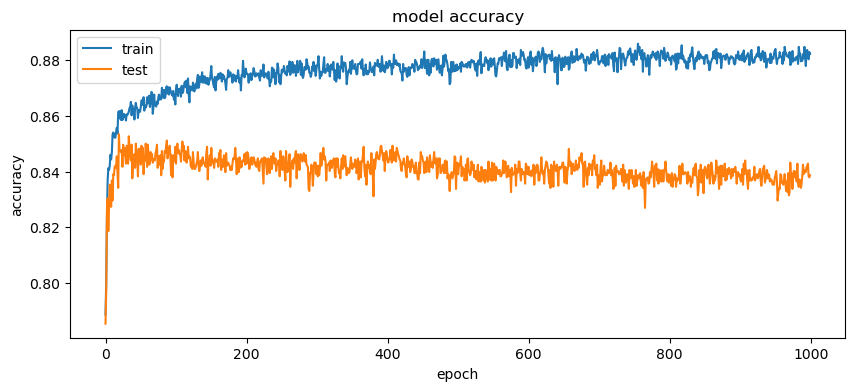

In [74]:
#plotting for accuracy

plt.subplots(figsize = (10,4))
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.xlabel("epoch")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.legend(["train","test"])

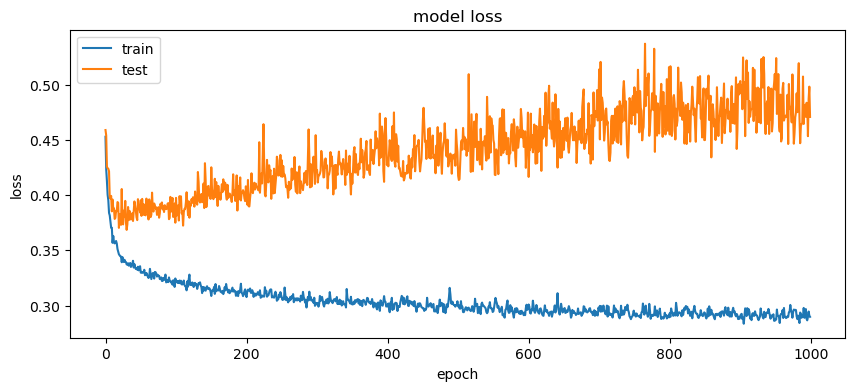

In [75]:
#plotting for loss

plt.subplots(figsize = (10,4))
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.xlabel("epoch")
plt.title("model loss")
plt.ylabel("loss")
plt.legend(["train","test"])

# Predictions

In [81]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 323us/step


In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1525,   93],
       [ 210,  172]])

In [87]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)


0.8485

# To see weights at each layers

In [88]:
classifier.get_weights()

[array([[ 3.81944752e+00, -6.01091444e-01,  5.88306546e-01,
         -4.50654328e-01, -1.82154894e-01,  2.97048718e-01,
          5.77273703e+00, -3.46080780e-01, -4.82877523e-01,
          5.02428389e+00, -1.34073243e-01,  1.66128922e+00],
        [-7.86998093e-01, -2.85485363e+00, -1.57591671e-01,
          3.91587168e-02, -4.25261647e-01, -2.07687879e+00,
         -4.44783735e+00, -1.02125430e+00,  1.04269946e+00,
          7.24844277e-01, -2.74783134e+00, -2.72856998e+00],
        [-3.99045229e+00,  5.94429398e+00, -3.10787392e+00,
          1.10077941e+00,  1.59691181e-02, -2.33402991e+00,
          2.87087250e+00,  1.35333574e+00,  1.24014306e+00,
          1.68361437e+00, -4.54871988e+00, -4.39823246e+00],
        [-6.33211803e+00,  7.42548823e-01,  1.45556450e+00,
         -2.21465871e-01,  1.62237853e-01,  6.59319282e-01,
         -1.61248282e-01, -6.48227096e-01,  9.72429216e-01,
          3.47732067e+00, -4.75795656e-01,  1.77525330e+00],
        [ 4.82431889e+00, -6.4475655